# Práctica 3. Análisis de componentes principales (ACP)

El análisis de componentes principales(ACP), es un método estadísitco que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Esta es una técnica de aprendizaje no supervisado y tiene el objetivo de predecir una variable respuesta Y.

In [1]:
#Importamos las librerías con las que trabajaremos y visualizaremos los datos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [9]:
#Ahora importamos nuestro dataset y visualizamos la cabecera y primeros renglones
path = 'CC GENERAL.csv'
df = pd.read_csv(path)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
#Eliminamos la columna 'CUST_ID' ya que es una variable categórica y sólo necesitamos numéricas.
del df['CUST_ID']

In [15]:
#Visualizamos la cabecera de nuestro dataset
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Antes de aplicar la técnica de datos ACP es necesario normalizar nuestros datos para que, por ejemplo, los datos de la variable 'BALANCE' no sean más pesados que los de 'BALANCE_FREQUENCY' por decirlo de alguna manera. Otra forma es que esto quiere decir que si existe ruido entre las variables, este será ampliado.

In [17]:
#Importamos la libería para poder escalar los datos.
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
#escala de datos
scaled_data = scaler.transform(df)

### ACP

In [22]:
#Importamos PCA
from sklearn.decomposition import PCA

In [24]:
#creamos una variable que nos sirva para establecer el numero de componenetes que queremos para que toda la información quede 
#intacta
acp = PCA(n_components=2)

In [26]:
#ahora decimos que acp se ajuste a la escala de datos(scaled_data)
acp.fit(scaled_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [28]:
#ya que no podemos usar la funcion fit() porque existen valores NaN, procedemos a reemplzarlos con 0's
df = df.fillna(value=0)

In [30]:
scaled_data = scaler.transform(df)
acp.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
#guardamos en una variable nueva nuestros dos componentes
x_pca = acp.transform(scaled_data)

In [34]:
#notamos que tenemos nuestros renglones completos y solo dos componentes
x_pca.shape

(8950, 2)

Text(0, 0.5, 'Segunda Componente Principal')

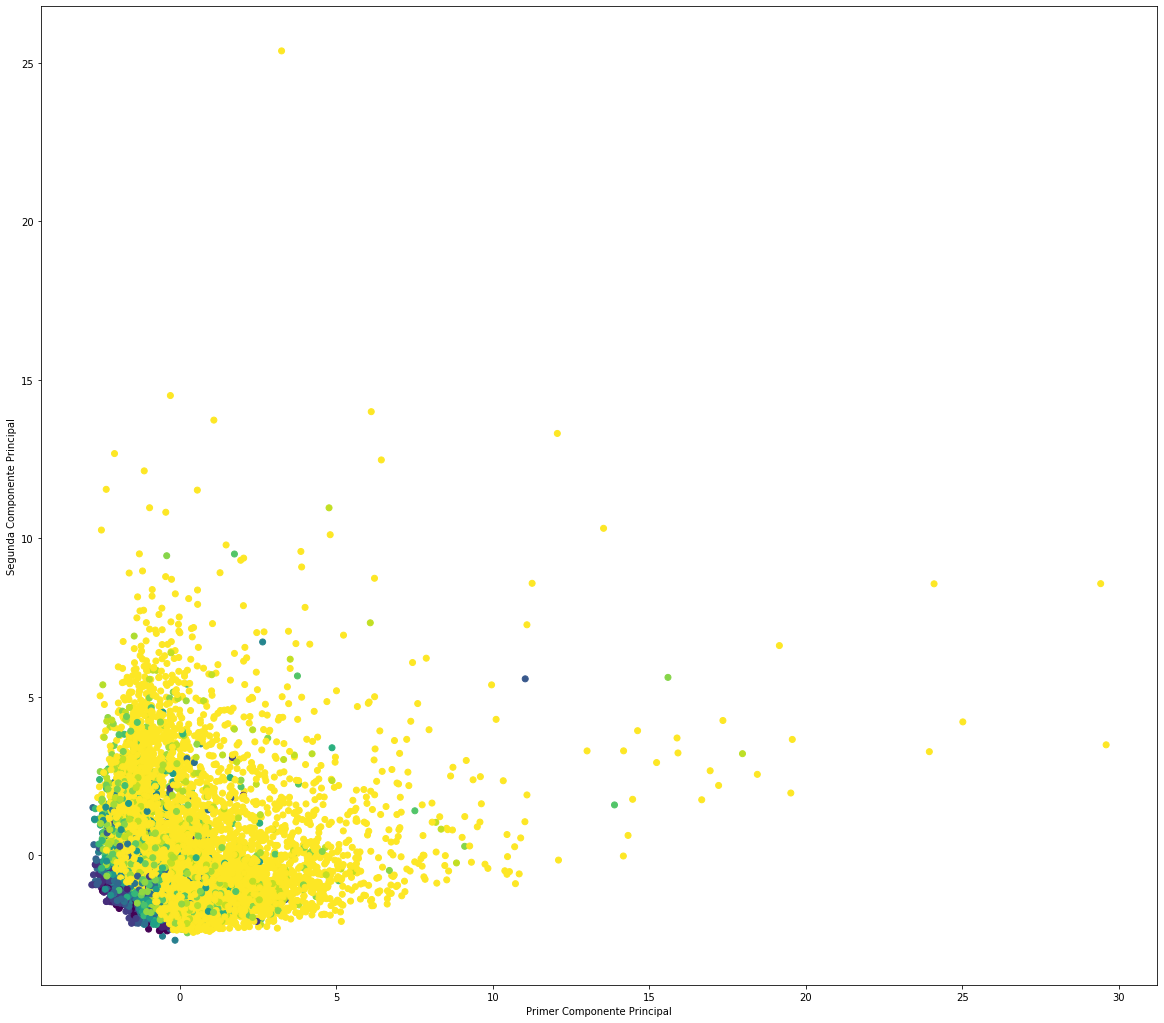

In [52]:
#graficamos nuestros componentes
plt.figure(figsize=(20,18))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['BALANCE_FREQUENCY'])
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segunda Componente Principal')

In [41]:
df.keys()

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [57]:
df_comp = pd.DataFrame(acp.components_, columns=df.keys())

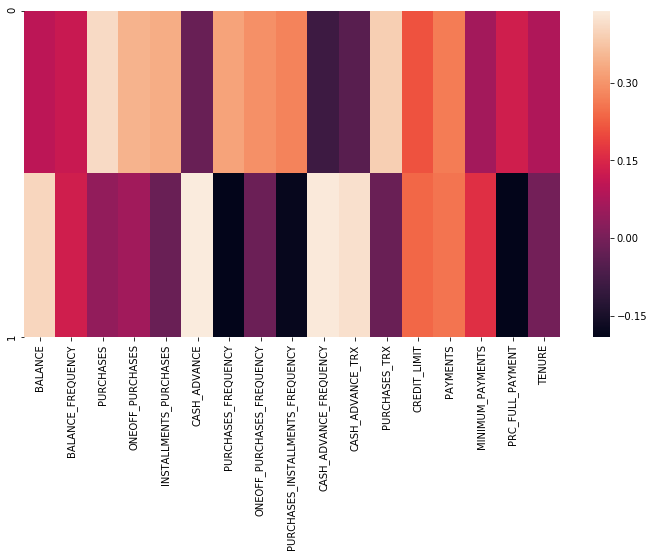

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

El mapa nos muestra que tan correlacionadas están las variables con cada componente principal, siendo los colores claros los de mayor correlación. Yo escogería la primer componente, ya que es la que explica mejor las características de las variables.